# NSE Stocks Data
---
## Uso de DataFrames

Los DataFrames son el tipo de objetos principales de Pandas. Son una representación de una tabla. Se pueden acceder a las filas y las columnas. Cada una de las columnas se considera una Serie.

## Proceso para analizar un archivo

1. Cargar el archivo en un DataFrame.
2. Hacer una revisión de los tipos de datos del archivo.
3. Revisar si existen datos nulos y datos duplicados en el archivo.
4. Eliminar inconsistencias.
5. Llevar a cabo el análisis apoyados de gráfica.

## Tomar en consideración:

- Elegir un archivo que contenga datos numéricos y no numéricos.
- Crear un archivo como este que contenga la descripción de su proceso de análisis.
- Preparar una presentación para el día de entrega (viernes).

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("Spotify Most Streamed Songs.csv")

In [30]:
# df.head() -> Primeras 5 filas de su archivo
# df.head(n) -> Primeras n filas de su archivo
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [31]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,https://i.scdn.co/image/ab67616d0000b273992a1f...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [33]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [34]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [39]:
# Selección
df["streams"]

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [40]:
df[['artist(s)_name', 'released_year', 'released_month', 'released_day', 'streams']]

,artist(s)_name,released_year,released_month,released_day,streams
0,"Latto, Jung Kook",2023,7,14,141381703
1,Myke Towers,2023,3,23,133716286
2,Olivia Rodrigo,2023,6,30,140003974
3,Taylor Swift,2019,8,23,800840817
4,Bad Bunny,2023,5,18,303236322
...,...,...,...,...,...
948,Selena Gomez,2022,11,3,91473363
949,Taylor Swift,2022,10,21,121871870
950,"Feid, Paulo Londra",2022,11,3,73513683
951,"Feid, Sech, Jhayco",2022,10,20,133895612


In [43]:
df.dropna(inplace=True)

In [46]:
#Para limpiar streams 
import pandas as pd
import re

# Código de limpieza
def extraer_streams(texto):
    texto_str = str(texto)
    match = re.match(r'^(\d+)', texto_str)
    return match.group(1) if match else None

df["streams_clean"] = df["streams"].apply(extraer_streams)
df["streams_numeric"] = pd.to_numeric(df["streams_clean"], errors='coerce')

# Medidas de tendencia central
print(f"Promedio: {df['streams_numeric'].mean()}")
print(f"Mediana: {df['streams_numeric'].median()}")
print(f"Moda: {df['streams_numeric'].mode().iloc[0]}")

# Medidas de dispersión
print(f"Desviación estándar: {df['streams_numeric'].std()}")
print(f"Varianza: {df['streams_numeric'].var()}")

# Medidas de posicionamiento
print(f"Mínimo: {df['streams_numeric'].min()}")
print(f"Q1: {df['streams_numeric'].quantile(0.25)}")
print(f"Q2: {df['streams_numeric'].quantile(0.50)}")
print(f"Q3: {df['streams_numeric'].quantile(0.75)}")
print(f"Máximo: {df['streams_numeric'].max()}")

Promedio: 468985764.4080882
Mediana: 263836779.5
Moda: 156338624.0
Desviación estándar: 523126748.21428
Varianza: 2.7366159469724672e+17
Mínimo: 2762.0
Q1: 134284821.0
Q2: 263836779.5
Q3: 601198591.25
Máximo: 3562543890.0


<Axes: >

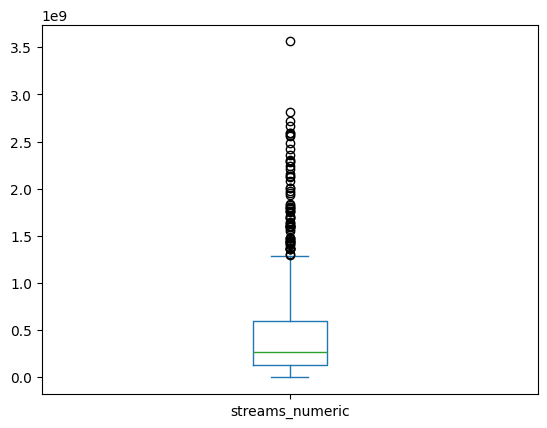

In [47]:
# Cajas y bigotes (box & whiskers) -> Gráficas de cajas (boxplots)
df["streams_numeric"].plot.box()

In [48]:
df["streams_numeric"].dtype

dtype('float64')

In [49]:
columnas_númericas = []
columnas_no_númericas = []
for col in df.columns:
    if df[col].dtype == "object":
        columnas_no_númericas.append(col)
    else:
        columnas_númericas.append(col)
print(f"Columnas numéricas: {columnas_númericas}")
print(f"Columnas no numéricas: {columnas_no_númericas}")

Columnas numéricas: ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams_numeric']
Columnas no numéricas: ['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode', 'cover_url', 'streams_clean']


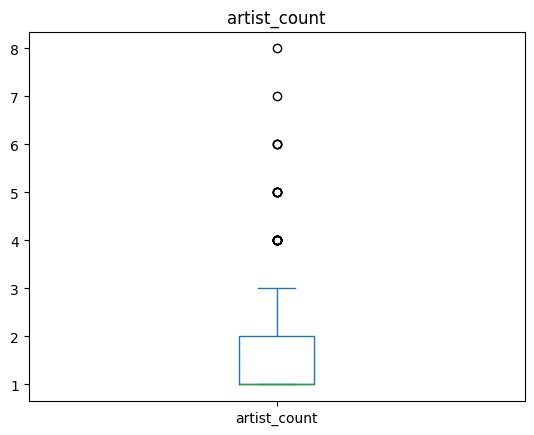

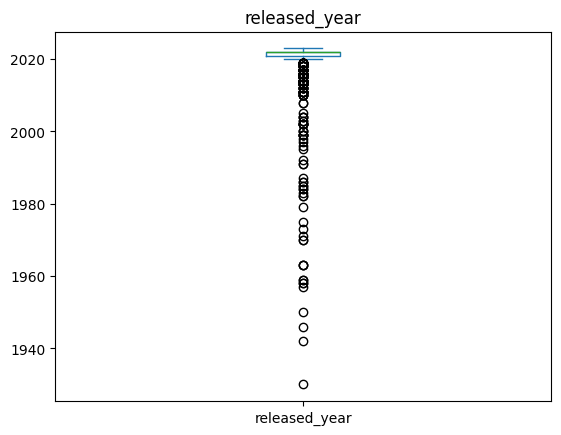

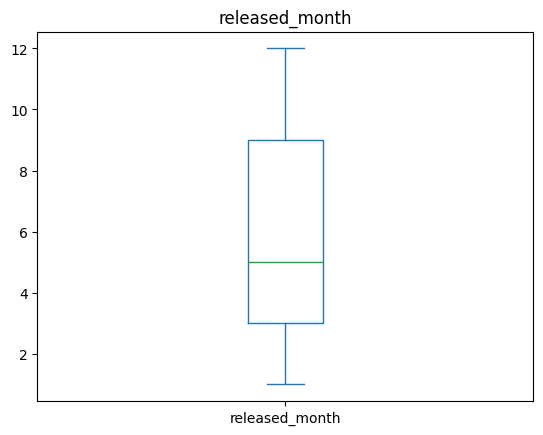

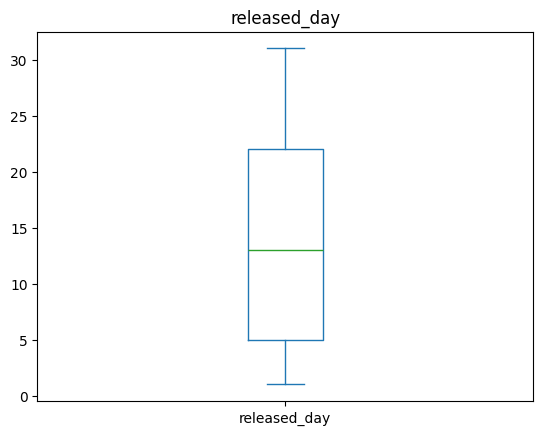

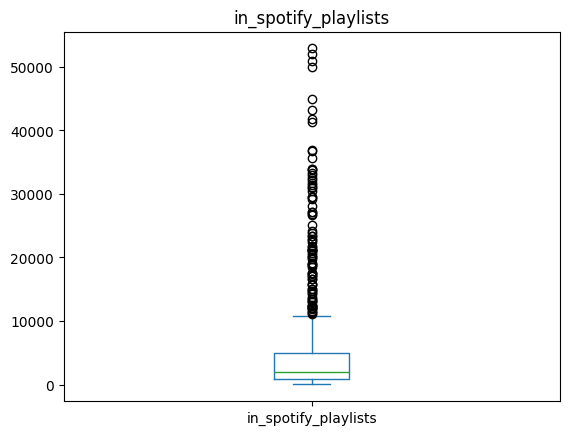

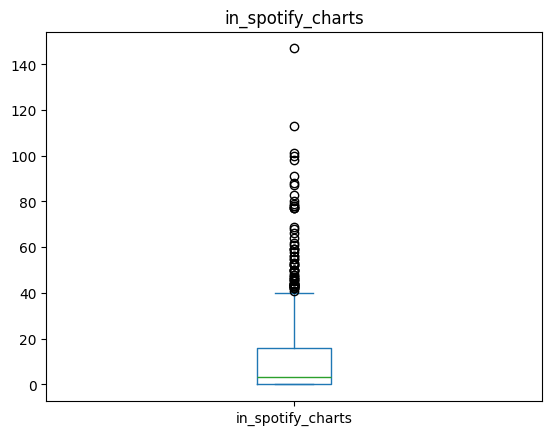

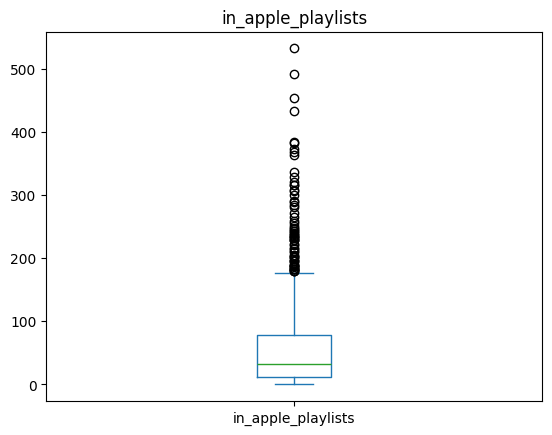

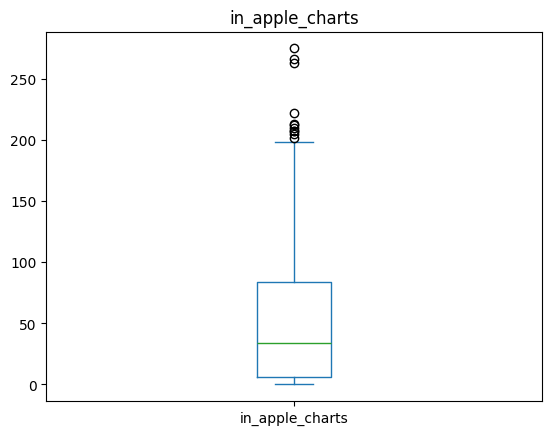

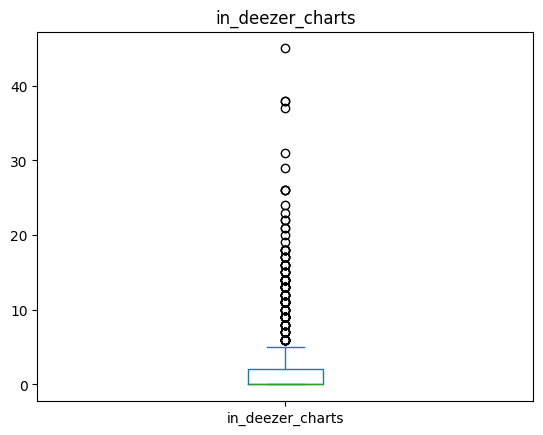

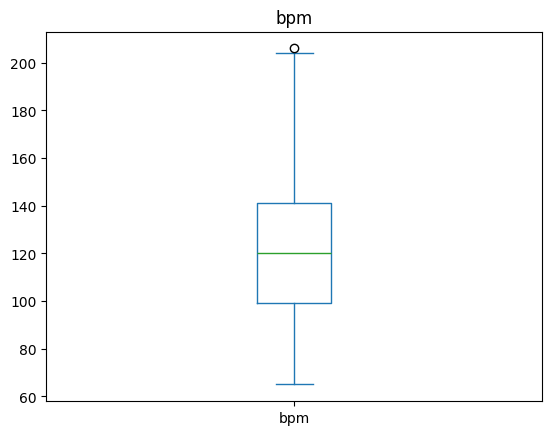

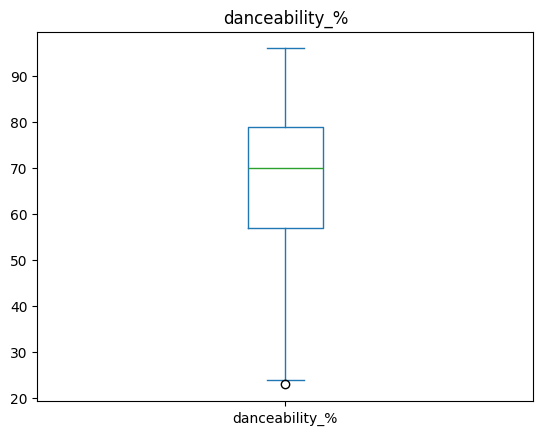

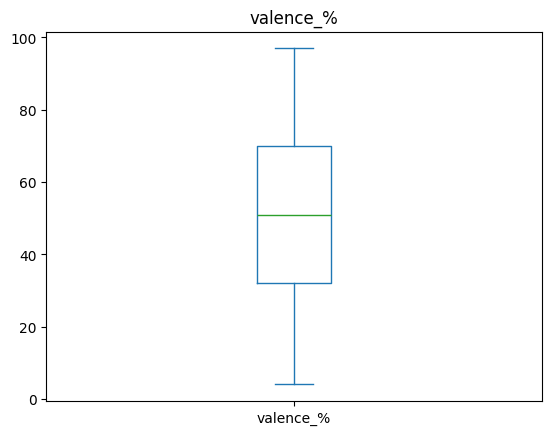

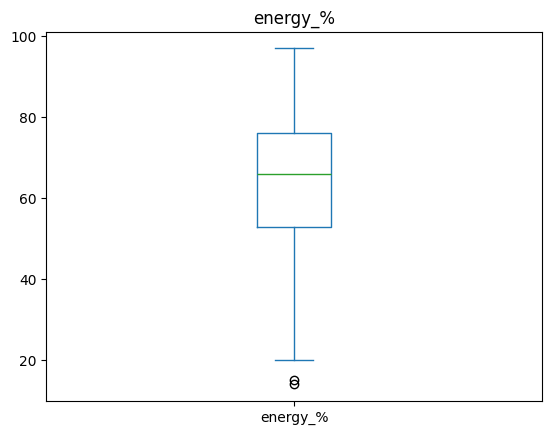

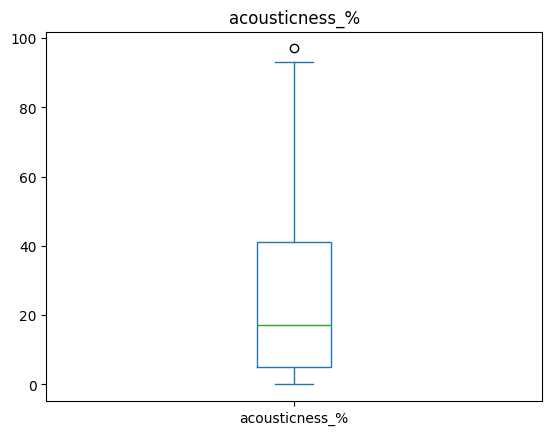

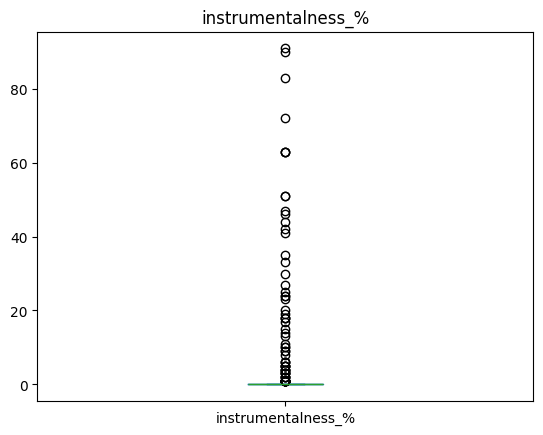

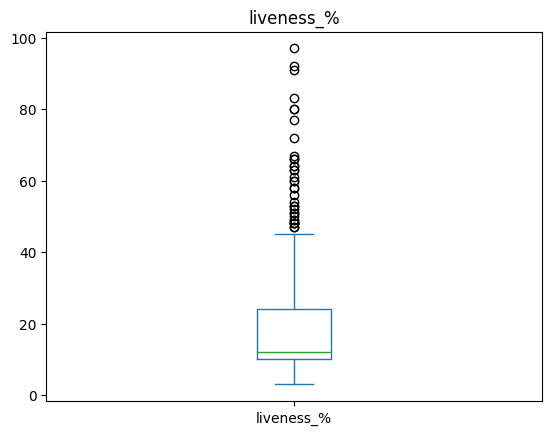

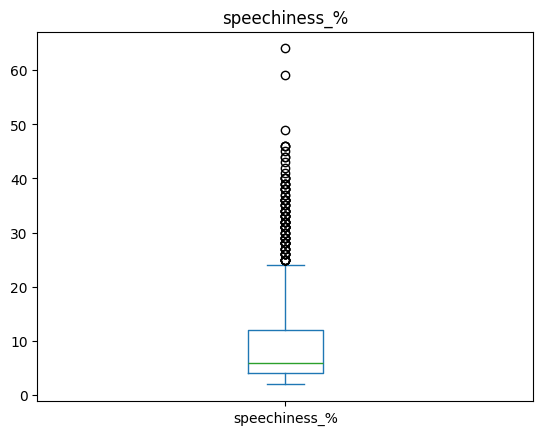

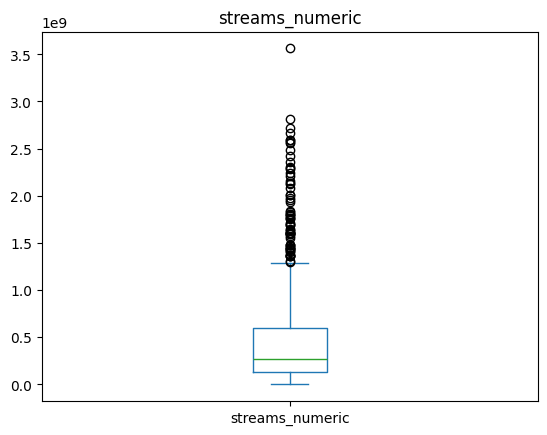

In [50]:
for col in columnas_númericas:
    df[col].plot.box(title=col)
    plt.show()

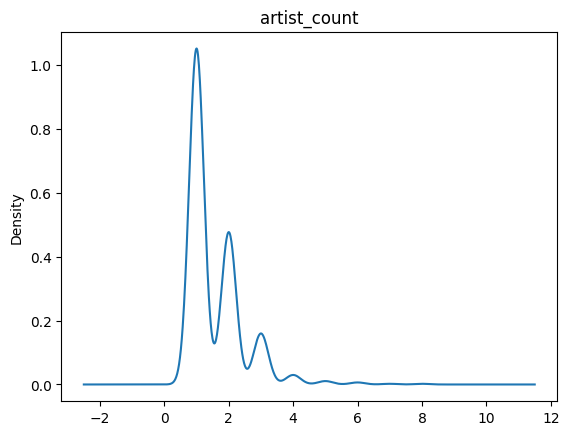

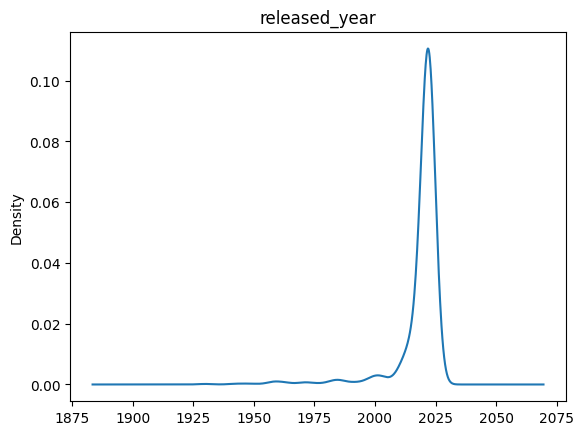

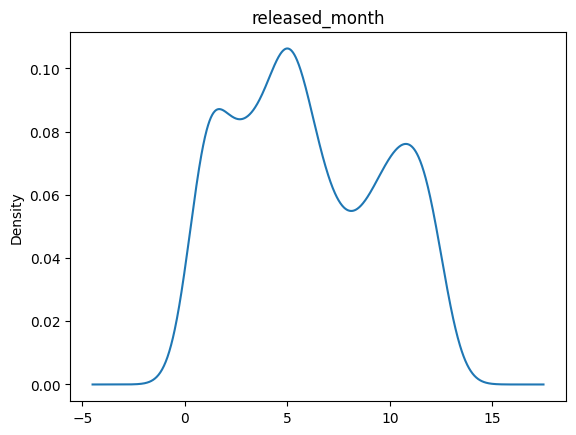

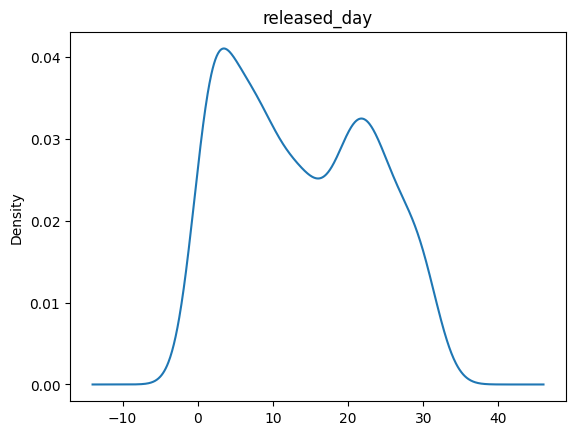

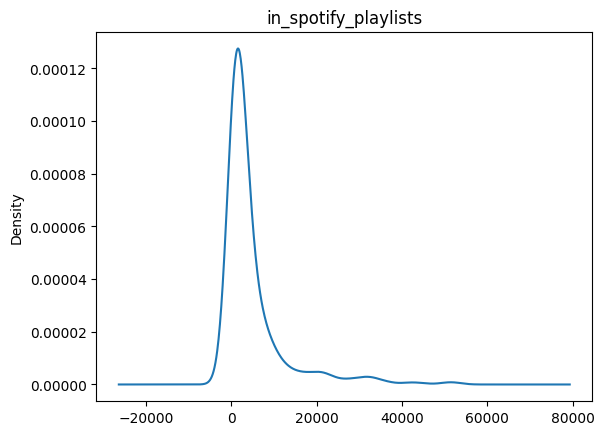

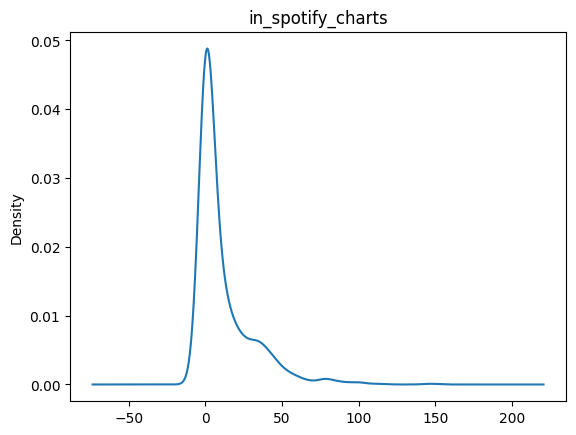

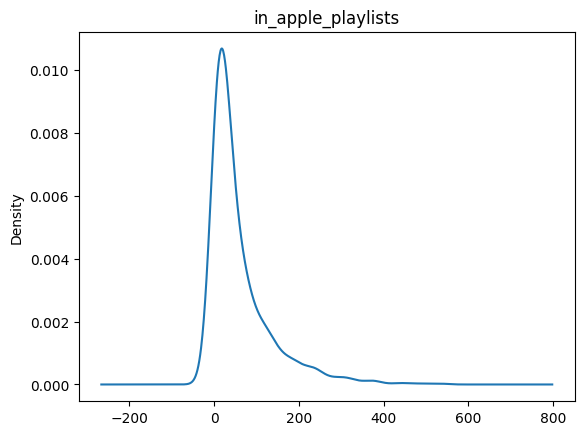

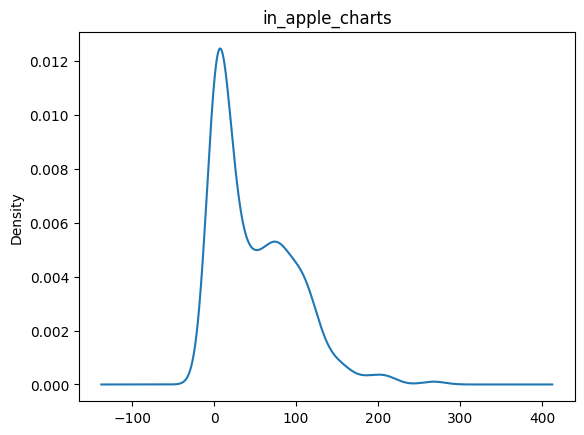

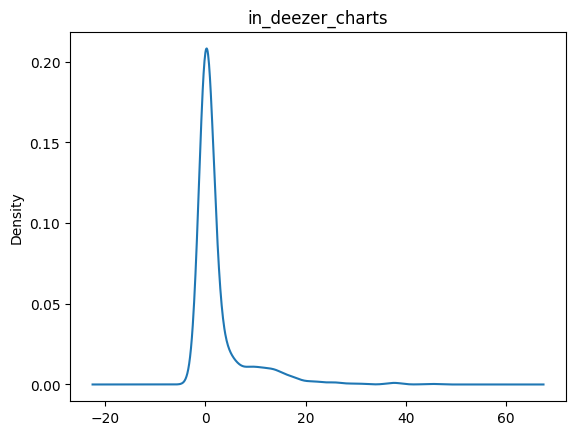

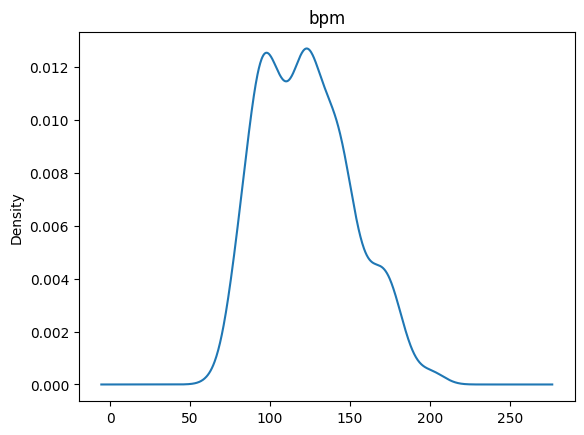

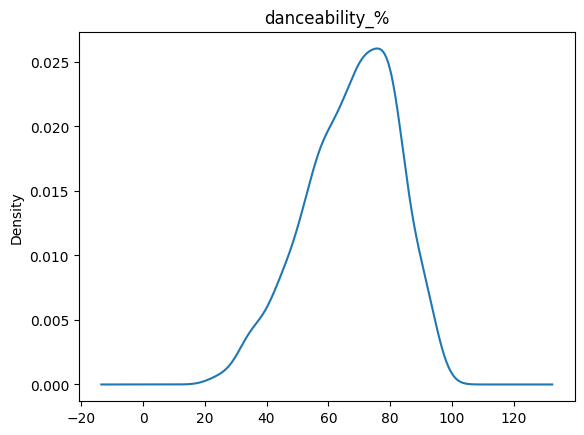

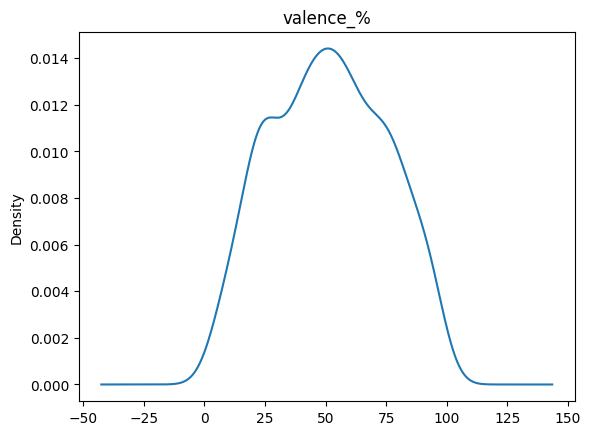

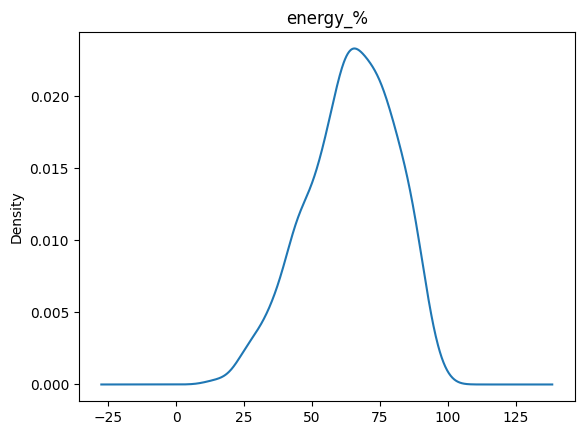

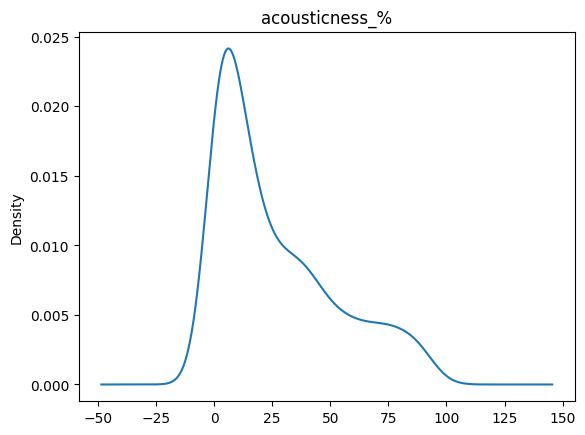

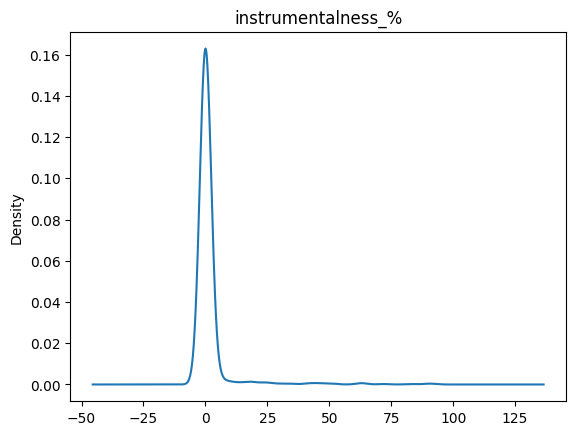

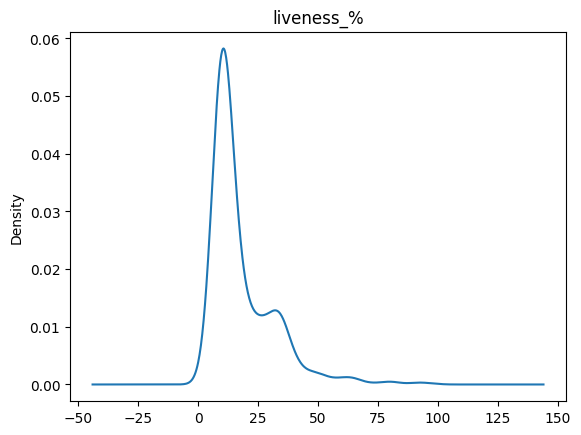

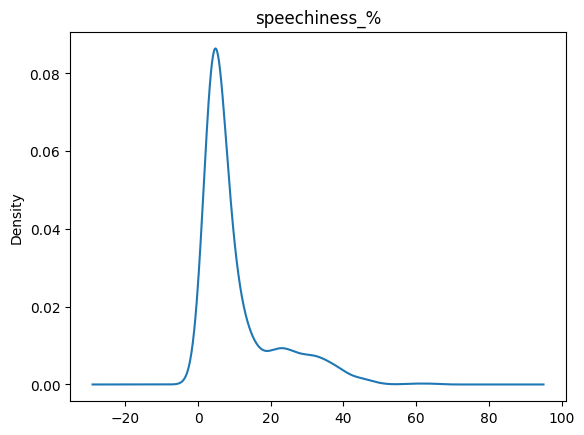

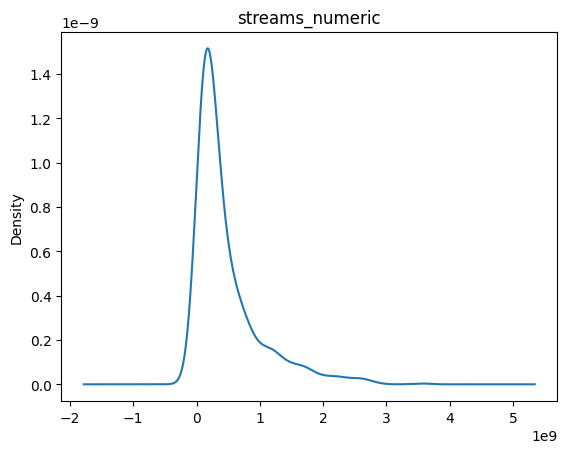

In [51]:
for col in columnas_númericas:
    df[col].plot.kde(title=col)
    plt.show()

In [52]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,streams_clean,streams_numeric
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,Not Found,141381703,141381703.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,133716286,133716286.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,140003974,140003974.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,800840817,800840817.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...,303236322,303236322.0


In [57]:
df.groupby("artist(s)_name")["streams_numeric"].mean().reset_index().nlargest(5, "streams_numeric")

,artist(s)_name,streams_numeric
409,"Post Malone, Swae Lee",2.808097e+09
128,"Drake, WizKid, Kyla",2.713922e+09
235,"Justin Bieber, The Kid Laroi",2.665344e+09
496,"The Chainsmokers, Halsey",2.591224e+09
507,"The Weeknd, Daft Punk",2.565530e+09


<Axes: xlabel='artist(s)_name'>

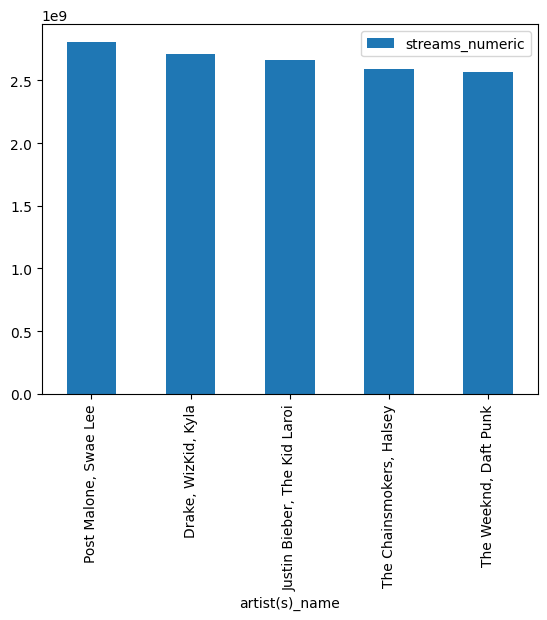

In [77]:
df.groupby("artist(s)_name")["streams_numeric"].mean().reset_index().nlargest(5, "streams_numeric").plot.bar(x="artist(s)_name", y="streams_numeric")

In [59]:
df["artist(s)_name"].value_counts().nlargest(5)

artist(s)_name
Taylor Swift      29
SZA               17
Bad Bunny         16
The Weeknd        15
Kendrick Lamar    12
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 Artistas por Total de Streams'}, ylabel='streams_numeric'>

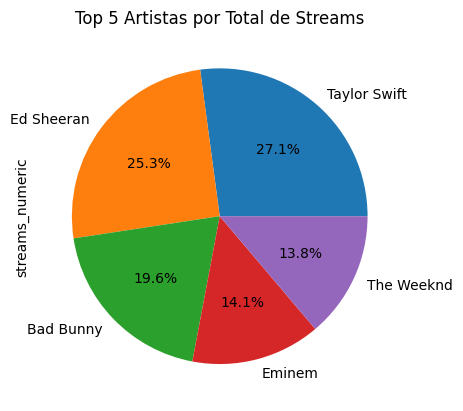

In [74]:
# Top artistas por STREAMS (más relevante)
(df.groupby("artist(s)_name")["streams_numeric"]
 .sum()
 .nlargest(5)
 .plot.pie(autopct="%.1f%%", title="Top 5 Artistas por Total de Streams"))

<Axes: title={'center': 'Top 5 Artistas con más canciones'}, ylabel='count'>

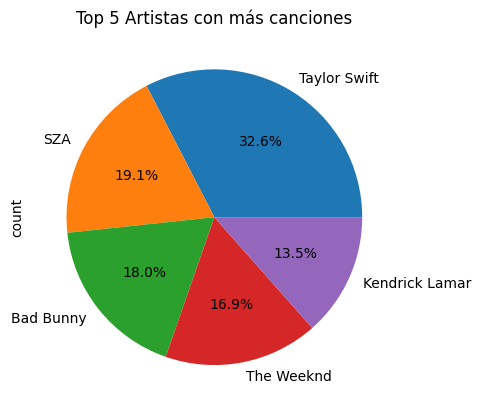

In [75]:
df["artist(s)_name"].value_counts().nlargest(5).plot.pie(autopct="%.1f%%", title = "Top 5 Artistas con más canciones")

In [61]:
df["streams_numeric"].value_counts(bins=10)

(-3559779.129, 356256874.8]     494
(356256874.8, 712510987.6]      157
(712510987.6, 1068765100.4]      66
(1068765100.4, 1425019213.2]     42
(1425019213.2, 1781273326.0]     26
(1781273326.0, 2137527438.8]     14
(2137527438.8, 2493781551.6]      9
(2493781551.6, 2850035664.4]      7
(3206289777.2, 3562543890.0]      1
(2850035664.4, 3206289777.2]      0
Name: count, dtype: int64

<Axes: title={'center': 'Histograma de los streams que tienen las canciones'}, ylabel='Frequency'>

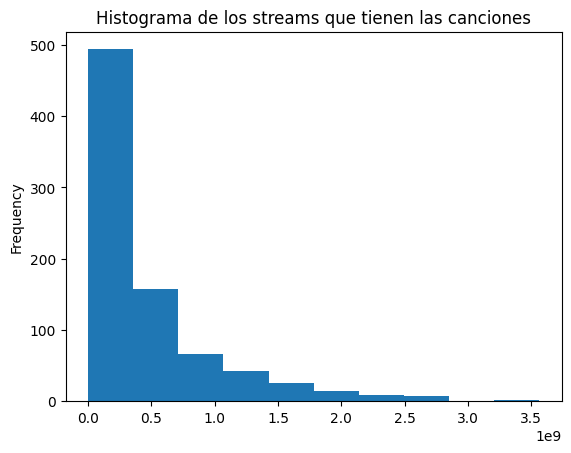

In [62]:
df["streams_numeric"].plot.hist(bins=10, title="Histograma de los streams que tienen las canciones")

In [63]:
df["artist(s)_name"].unique()

array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas', 'Bad Bunny, Grupo Frontera', 'NewJeans',
       'David Kushner', 'SZA', 'Fifty Fifty', 'Feid, Young Miko', 'Jimin',
       'Gabito Ballesteros, Junior H, Peso Pluma', 'Bizarrap, Peso Pluma',
       'The Weeknd, Madonna, Playboi Carti', 'Fuerza Regida',
       'Rï¿½ï¿½ma, Selena G', 'Tainy, Bad Bunny', 'Morgan Wallen',
       'Dua Lipa', 'Troye Sivan', 'Peso Pluma, Grupo Frontera',
       'The Weeknd, 21 Savage, Metro Boomin', 'Karol G, Shakira',
       'Yahritza Y Su Esencia, Grupo Frontera', 'Junior H, Peso Pluma',
       'Post Malone, Swae Lee', 'Bebe Rexha, David Guetta',
       'Tyler, The Creator, Kali Uchis', 'Miley Cyrus', 'The Weeknd',
       'The Weeknd, Daft Punk', 'Ariana Grande, The Weeknd',
       'Feid, Myke Towers, Sky Rompiendo',
       'David Guetta, Anne-Marie, Coi 

In [67]:
# Artista con más streams
top_artista = df.groupby("artist(s)_name")["streams_numeric"].sum().idxmax()
print(f"Artista más escuchado: {top_artista}")

# Canción más popular  
top_cancion = df.loc[df["streams_numeric"].idxmax()]
print(f"Canción más popular: {top_cancion['track_name']} - {top_cancion['artist(s)_name']}")

# Evolución por años
streams_por_año = df.groupby("released_year")["streams_numeric"].sum()
print("\nStreams por año:")
print(streams_por_año)

Artista más escuchado: Taylor Swift
Canción más popular: Shape of You - Ed Sheeran

Streams por año:
released_year
1930    9.059852e+07
1942    3.955914e+08
1946    3.897720e+08
1950    4.732483e+08
1957    1.786605e+08
1958    5.413494e+08
1959    5.734178e+08
1963    1.311263e+09
1970    5.200345e+08
1971    4.604928e+08
1973    8.385868e+08
1975    2.009095e+09
1979    4.039395e+08
1982    3.502754e+08
1983    1.593271e+09
1984    1.830752e+09
1985    2.230810e+09
1986    1.133676e+09
1987    1.553498e+09
1991    2.058840e+09
1992    1.271293e+09
1995    5.793951e+08
1996    1.069331e+08
1997    1.037625e+08
1998    1.284943e+09
1999    5.403078e+09
2000    3.672857e+09
2002    8.679723e+09
2003    3.168043e+09
2004    2.857995e+09
2005    1.805775e+08
2008    2.480816e+09
2010    6.290405e+09
2011    7.906074e+09
2012    6.178446e+09
2013    1.362225e+10
2014    1.530152e+10
2015    8.193809e+09
2016    1.930310e+10
2017    2.845008e+10
2018    1.214328e+10
2019    2.319092e+10
202

In [69]:
# Canciones con más de 1 millón de streams
df.loc[df["streams_numeric"] > 1000000]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,streams_clean,streams_numeric
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,Not Found,141381703,141381703.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,133716286,133716286.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,140003974,140003974.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,800840817,800840817.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...,303236322,303236322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...,91473363,91473363.0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...,121871870,121871870.0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,80,81,67,4,0,8,6,Not Found,73513683,73513683.0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,82,67,77,8,0,12,5,Not Found,133895612,133895612.0


In [78]:
# Canciones con alta energía Y alta bailabilidad
df.loc[(df["energy_%"] > 0.8) & (df["danceability_%"] > 0.7), 
       ["track_name", "artist(s)_name", "energy_%", "danceability_%"]]

# Canciones de 2023 O 2024
df.loc[(df["released_year"] == 2023) | (df["released_year"] == 2024),
       ["track_name", "artist(s)_name", "released_year"]]

# Canciones que NO son de un artista específico
df.loc[~(df["artist(s)_name"] == "Artista X"),
       ["track_name", "artist(s)_name"]]

,track_name,artist(s)_name
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook"
1,LALA,Myke Towers
2,vampire,Olivia Rodrigo
3,Cruel Summer,Taylor Swift
4,WHERE SHE GOES,Bad Bunny
...,...,...
948,My Mind & Me,Selena Gomez
949,Bigger Than The Whole Sky,Taylor Swift
950,A Veces (feat. Feid),"Feid, Paulo Londra"
951,En La De Ella,"Feid, Sech, Jhayco"
